In [70]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import wrangle as wra

In [2]:
df = data('iris')

In [3]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Replace all '.' characters with '_' in column names
df.columns = df.columns.str.replace('.', '_')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Clustering with the Iris Dataset

* Using this lesson as a guide, perform clustering on the iris dataset.

    * Choose features other than the ones used in the lesson.
    * Visualize the results of your clustering.
    * Use the elbow method to visually select a good value for k.
    * Repeat the clustering, this time with 3 different features.

### petal_length vs. sepal length

In [5]:
X = df[['petal_length', 'sepal_length']]

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [7]:
df['cluster'] = kmeans.predict(X)

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

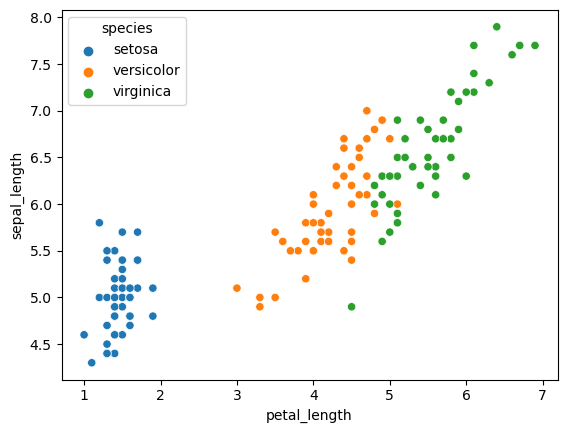

In [8]:
# Select the columns for the scatter plot
X = df[['petal_length', 'sepal_length']]

# Add the 'species' column to the selected columns
X['species'] = df['species']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='petal_length', y='sepal_length', hue='species', data=X)

In [9]:
def viz_iris(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['petal_length', 'sepal_length'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_length', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.petal_length, iris.sepal_length, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_length', ylabel = 'sepal_length', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

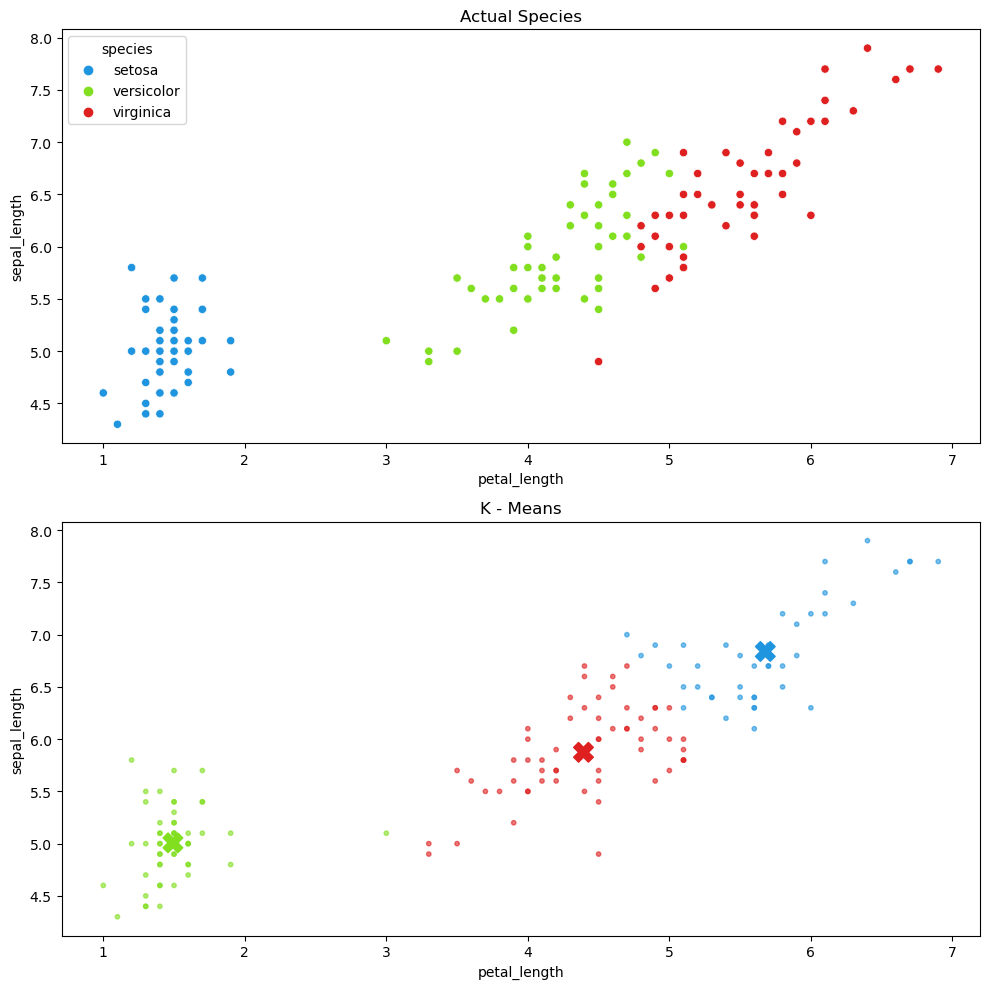

In [10]:
viz_iris(df)

In [11]:
kmeans.cluster_centers_

array([[1.49215686, 5.00784314],
       [5.67804878, 6.83902439],
       [4.39310345, 5.87413793]])

In [12]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
6,5.4,3.9,1.7,0.4,setosa,0
7,4.6,3.4,1.4,0.3,setosa,0
8,5.0,3.4,1.5,0.2,setosa,0
9,4.4,2.9,1.4,0.2,setosa,0
10,4.9,3.1,1.5,0.1,setosa,0


In [13]:
# Add the 'species' column to the selected columns
X['cluster'] = df['cluster']

In [14]:
df['cluster'] = df['cluster'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   cluster       150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


In [16]:
X = X.drop('species', axis=1)

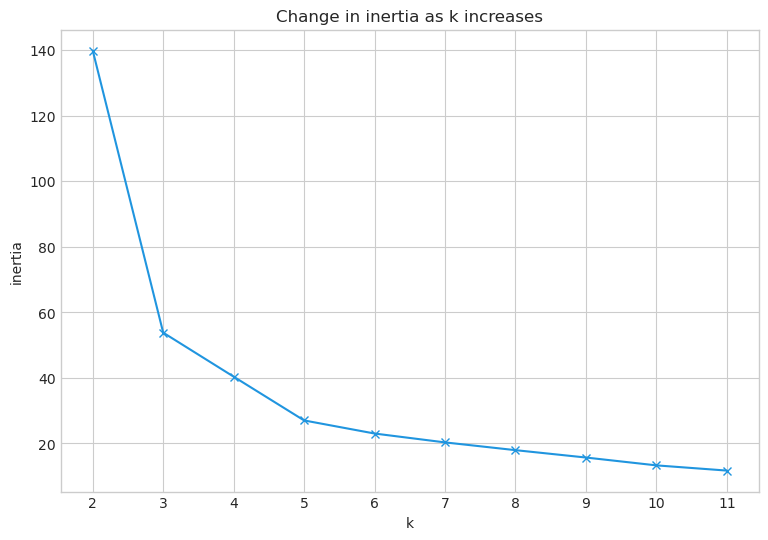

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### petal_length vs. sepal_width

In [18]:
X = df[['petal_length', 'sepal_width']]

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [20]:
df['cluster'] = kmeans.predict(X)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


<AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>

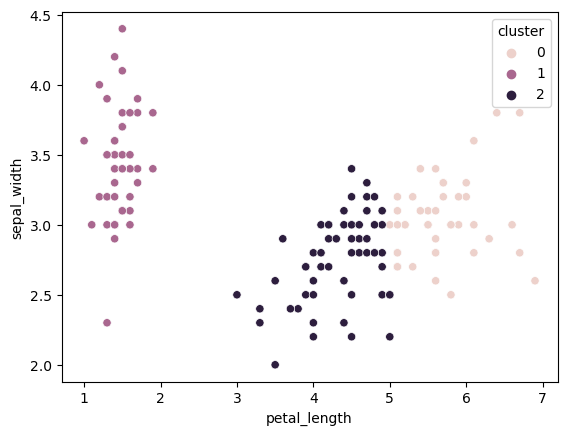

In [22]:
# Select the columns for the scatter plot
X = df[['petal_length', 'sepal_width']]

# Add the 'species' column to the selected columns
X['cluster'] = df['cluster']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='petal_length', y='sepal_width', hue='cluster', data=X)

In [23]:
kmeans.cluster_centers_

array([[5.67209302, 3.03255814],
       [1.462     , 3.428     ],
       [4.32807018, 2.75087719]])

In [24]:
X.head()

,petal_length,sepal_width,cluster
1,1.4,3.5,1
2,1.4,3.0,1
3,1.3,3.2,1
4,1.5,3.1,1
5,1.4,3.6,1


In [25]:
X = X.drop('cluster', axis=1)

In [26]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,sepal_width
0,5.672093,3.032558
1,1.462000,3.428000
2,4.328070,2.750877


In [27]:
def viz_iris2(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['petal_length', 'sepal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_width', ax = ax1, hue = 'cluster', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.petal_length, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_length', ylabel = 'sepal_width', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

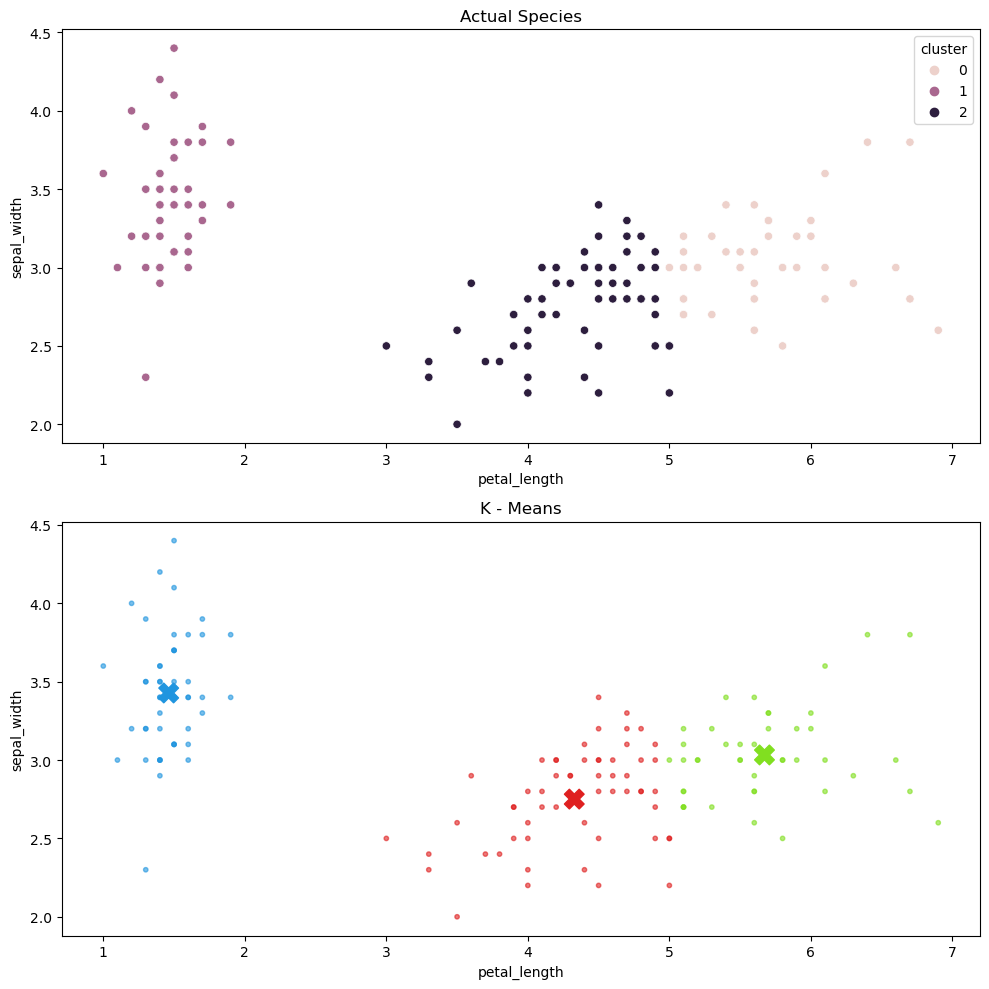

In [28]:
viz_iris2(df)

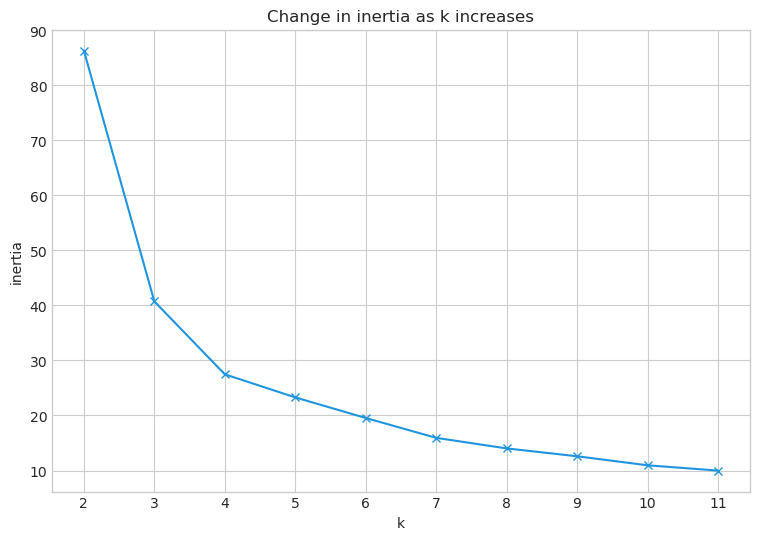

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

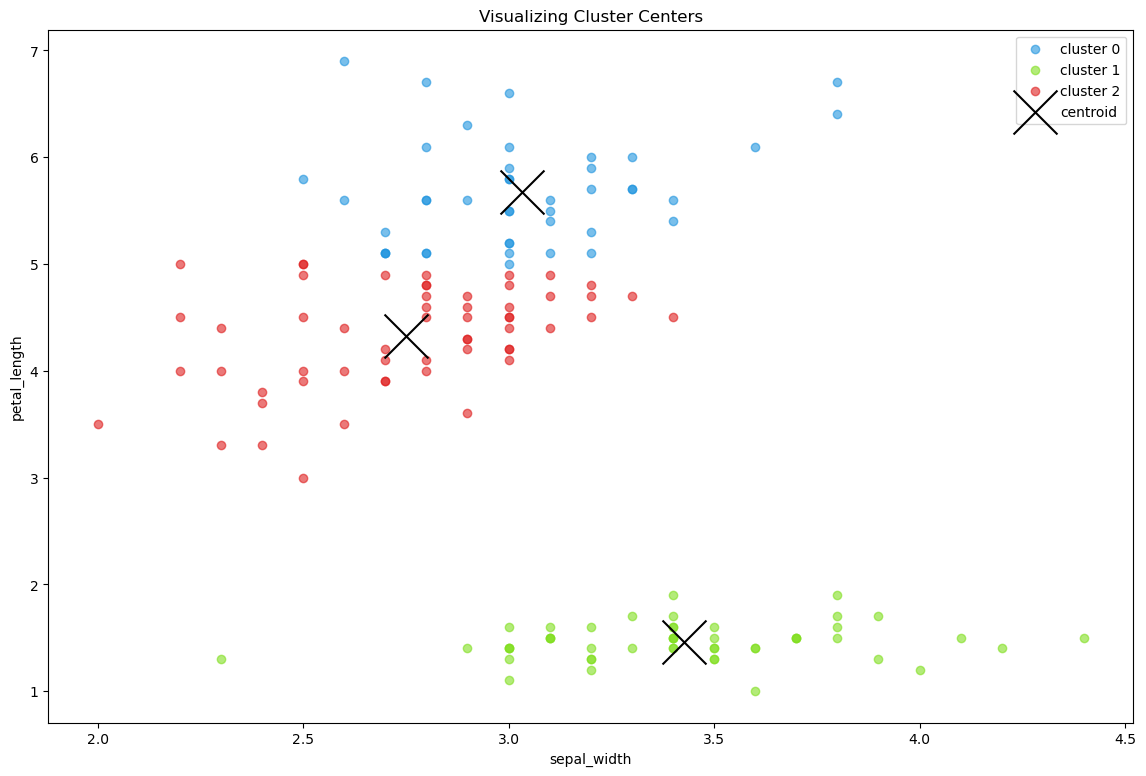

In [30]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

### petal_length vs. petal_width

In [31]:
X = df[['petal_length', 'petal_width']]

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [33]:
df['cluster'] = kmeans.predict(X)

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

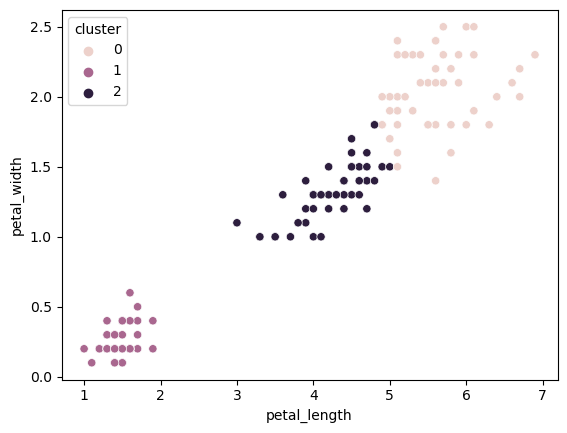

In [35]:
# Select the columns for the scatter plot
X = df[['petal_length', 'petal_width']]

# Add the 'species' column to the selected columns
X['cluster'] = df['cluster']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', data=X)

In [36]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [37]:
X.head()

,petal_length,petal_width,cluster
1,1.4,0.2,1
2,1.4,0.2,1
3,1.3,0.2,1
4,1.5,0.2,1
5,1.4,0.2,1


In [38]:
X = X.drop('cluster', axis=1)

In [39]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,petal_width
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


In [40]:
def viz_iris2(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['petal_length', 'petal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', ax = ax1, hue = 'cluster', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.petal_length, iris.petal_width, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_length', ylabel = 'petal_width', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

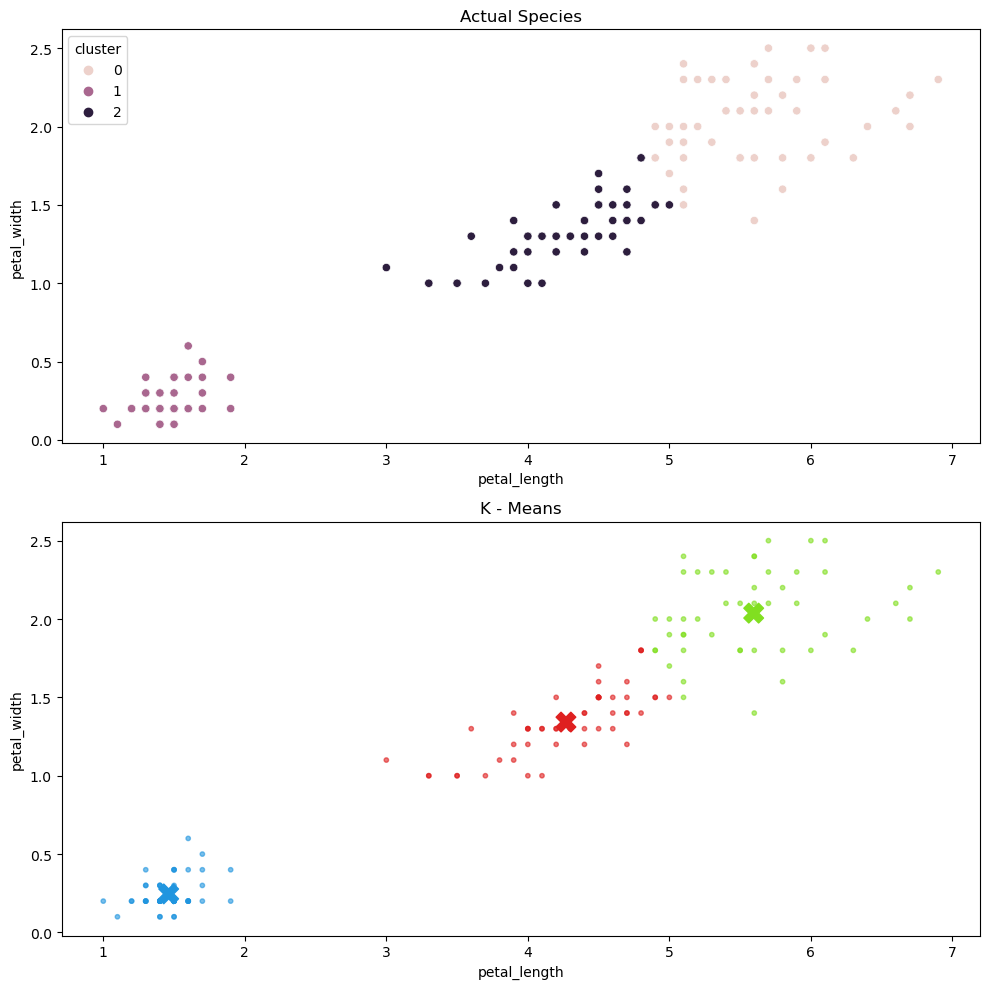

In [41]:
viz_iris2(df)

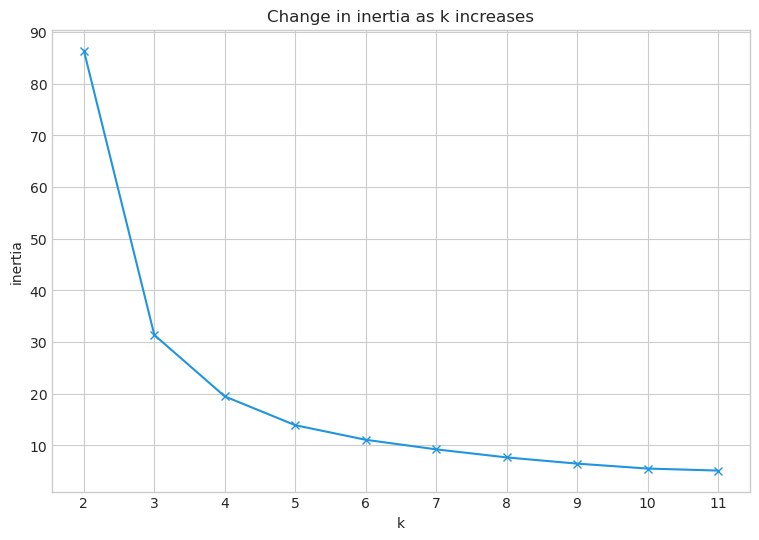

In [42]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

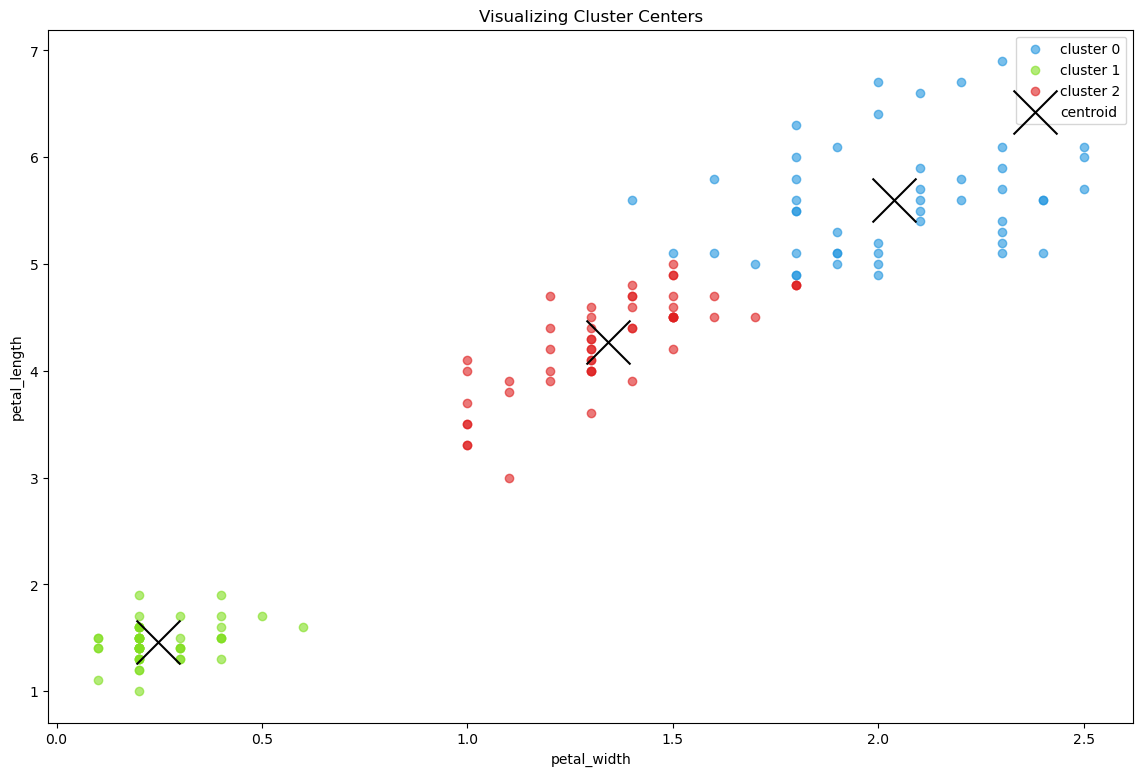

In [43]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.petal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='petal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

### sepal_length vs. sepal_width

In [44]:
X = df[['sepal_length', 'sepal_width']]

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [46]:
df['cluster'] = kmeans.predict(X)

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

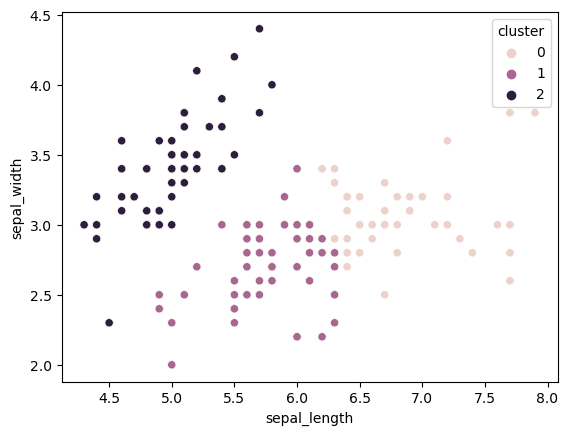

In [48]:
# Select the columns for the scatter plot
X = df[['sepal_length', 'sepal_width']]

# Add the 'species' column to the selected columns
X['cluster'] = df['cluster']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X)

In [49]:
kmeans.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

In [50]:
X.head()

,sepal_length,sepal_width,cluster
1,5.1,3.5,2
2,4.9,3.0,2
3,4.7,3.2,2
4,4.6,3.1,2
5,5.0,3.6,2


In [51]:
X = X.drop('cluster', axis=1)

In [52]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_length,sepal_width
0,6.812766,3.074468
1,5.773585,2.692453
2,5.006000,3.428000


In [53]:
def viz_iris2(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['sepal_length', 'sepal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', ax = ax1, hue = 'cluster', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.sepal_length, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'sepal_length', ylabel = 'sepal_width', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

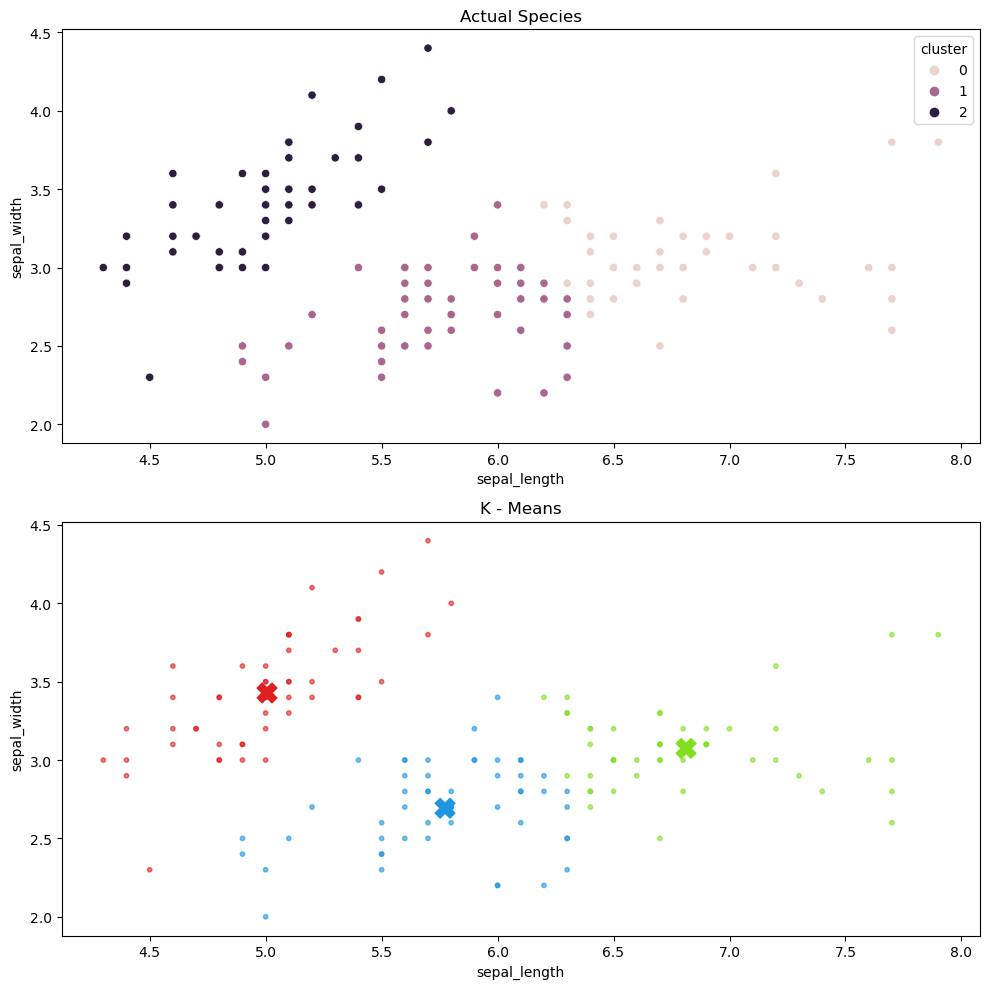

In [54]:
viz_iris2(df)

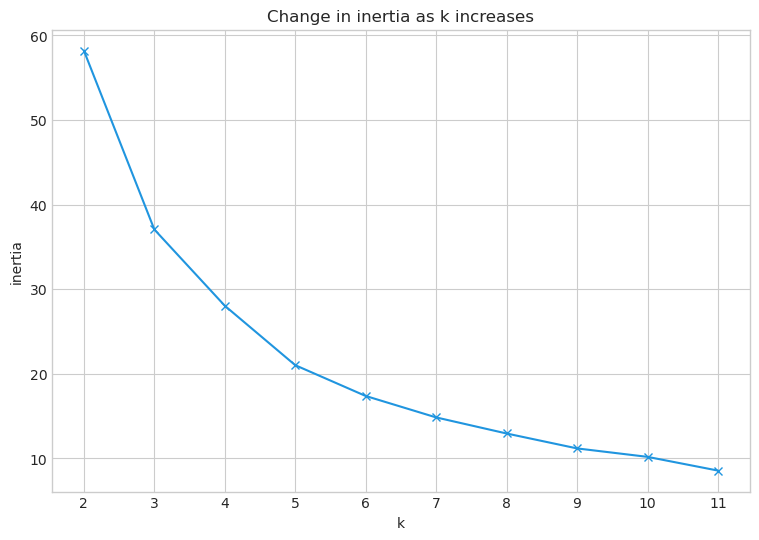

In [55]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

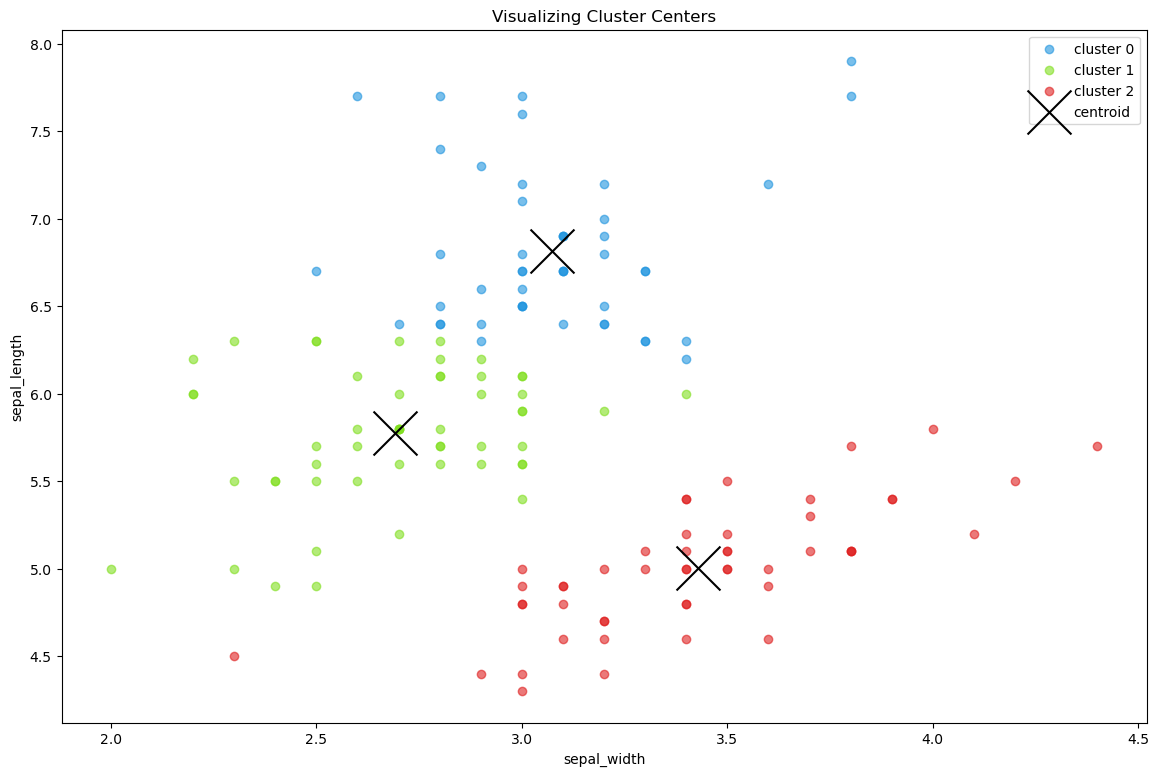

In [56]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.sepal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_length', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.title('Visualizing Cluster Centers')

### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [57]:
# build query and look at data
mall_query = """
        SELECT *
        FROM customers
        """

df = wra.get_mall_data(mall_query)

df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [58]:
df = df.drop('customer_id', axis = 1)

In [59]:
df = df.drop('Unnamed: 0', axis = 1)

In [60]:
# Create dummy columns for the 'gender' column
dummy_df = pd.get_dummies(df['gender'], prefix='gender')

# Add the dummy columns to the original dataframe
df = pd.concat([df, dummy_df], axis=1)

In [61]:
# Drop the 'gender' and 'gender_Female' columns from the dataframe
df = df.drop(['gender', 'gender_Female'], axis=1)

In [62]:
mall_train, mall_validate, mall_test = wra.split_data(df)

In [63]:
mall_train.head()

,age,annual_income,spending_score,gender_Male
63,54,47,59,0
48,29,40,42,0
24,54,28,14,0
136,44,73,7,0
176,58,88,15,1


In [64]:
#Select a couple features for clustering
mall_X=mall_train[['age', 'annual_income']]

In [65]:
#Initialize the KMeans model and fit it to my features
# MAKE the thing
mall_kmeans=KMeans(5)

# FIT the thing
mall_kmeans.fit(mall_X)

#USE the thing
mall_kmeans.predict(mall_X)

array([2, 0, 0, 1, 1, 4, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 4, 2, 2, 0, 0, 1,
       4, 4, 4, 3, 2, 1, 3, 0, 2, 2, 2, 3, 1, 1, 3, 0, 0, 2, 1, 0, 3, 2,
       1, 0, 4, 2, 1, 3, 4, 4, 1, 0, 1, 4, 3, 0, 2, 1, 4, 4, 0, 2, 1, 1,
       2, 3, 1, 3, 4, 4, 1, 2, 1, 2, 0, 0, 1, 4, 1, 2, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 3, 0, 0, 2, 2, 0, 4, 0, 1, 1, 2, 1, 2, 4, 1, 1, 3, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 4, 0], dtype=int32)

In [66]:
#Store the clusters in a new column
mall_train['cluster'] = mall_kmeans.predict(mall_X)

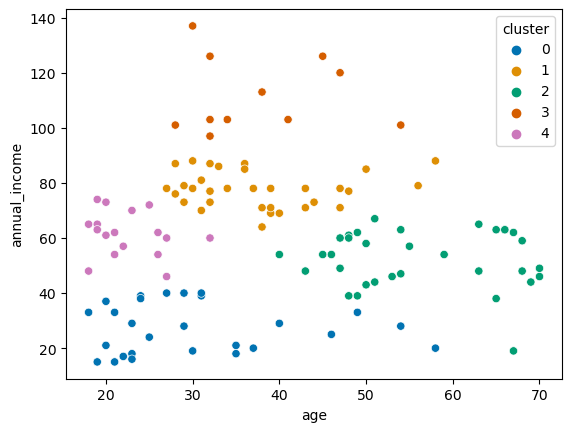

In [67]:
#Visualize the results
sns.scatterplot(x='age', y='annual_income', hue='cluster', palette='colorblind', data=mall_train)
plt.show()

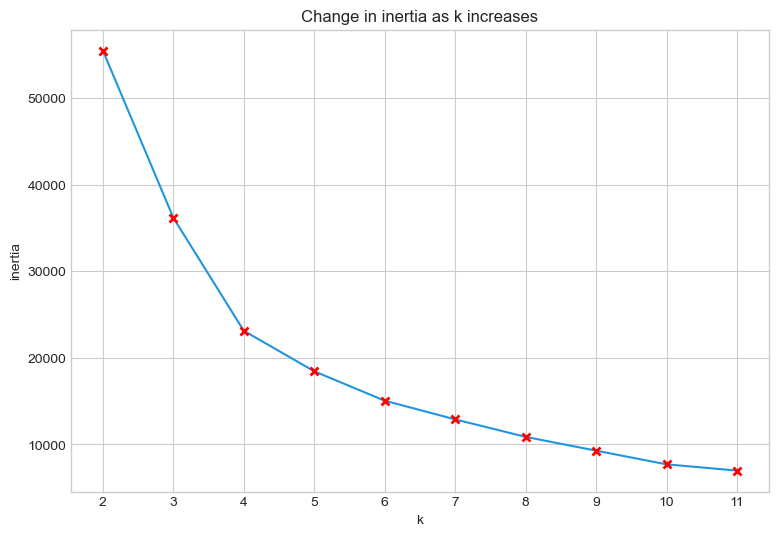

In [68]:
# lets plot inertia vs k
plt.style.use('seaborn-whitegrid')  # Set the grid style
plt.figure(figsize=(9, 6))

pd.Series({k: KMeans(k).fit(mall_X).inertia_ for k in range(2, 12)}).plot(marker='x',markeredgewidth=2, markeredgecolor='red')

plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.show()

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [69]:
#Create a copy of my original dataframe to scale
mall_df_scale = mall_train.copy()

In [71]:
#Create an instance of the scaler and fit/transform the same features I used before

mms = MinMaxScaler()

mall_df_scale[['age', 'annual_income']] = mms.fit_transform(mall_df_scale[['age', 'annual_income']])

mall_df_scale.head()

,age,annual_income,spending_score,gender_Male,cluster
63,0.692308,0.262295,59,0,2
48,0.211538,0.204918,42,0,0
24,0.692308,0.106557,14,0,0
136,0.500000,0.475410,7,0,1
176,0.769231,0.598361,15,1,1


In [72]:
#Subset these scaled features for training

X_scale=mall_df_scale[['age', 'annual_income']]

In [73]:
#Fit a new model to my scaled data

# MAKE the thing
kmeans_scale = KMeans(5)

# FIT the thing
kmeans_scale.fit(X_scale)

# USE the thing
kmeans_scale.predict(X_scale)

array([3, 2, 1, 3, 3, 4, 1, 3, 3, 3, 0, 1, 2, 2, 3, 1, 4, 3, 1, 2, 2, 3,
       4, 4, 4, 0, 3, 4, 0, 2, 1, 3, 1, 0, 3, 0, 0, 2, 2, 3, 4, 2, 0, 3,
       3, 2, 4, 1, 0, 0, 4, 4, 3, 2, 4, 4, 0, 2, 3, 3, 4, 4, 2, 3, 4, 3,
       3, 0, 3, 3, 4, 4, 3, 3, 4, 1, 2, 2, 0, 4, 0, 1, 1, 3, 3, 2, 2, 4,
       2, 3, 2, 0, 2, 2, 3, 1, 2, 4, 2, 4, 0, 3, 0, 3, 2, 4, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 0, 3, 0, 4, 3], dtype=int32)

In [74]:
#Store the resuts in a new column
mall_df_scale['cluster'] = kmeans_scale.predict(X_scale)

In [75]:
mall_df_scale.head()

,age,annual_income,spending_score,gender_Male,cluster
63,0.692308,0.262295,59,0,3
48,0.211538,0.204918,42,0,2
24,0.692308,0.106557,14,0,1
136,0.500000,0.475410,7,0,3
176,0.769231,0.598361,15,1,3


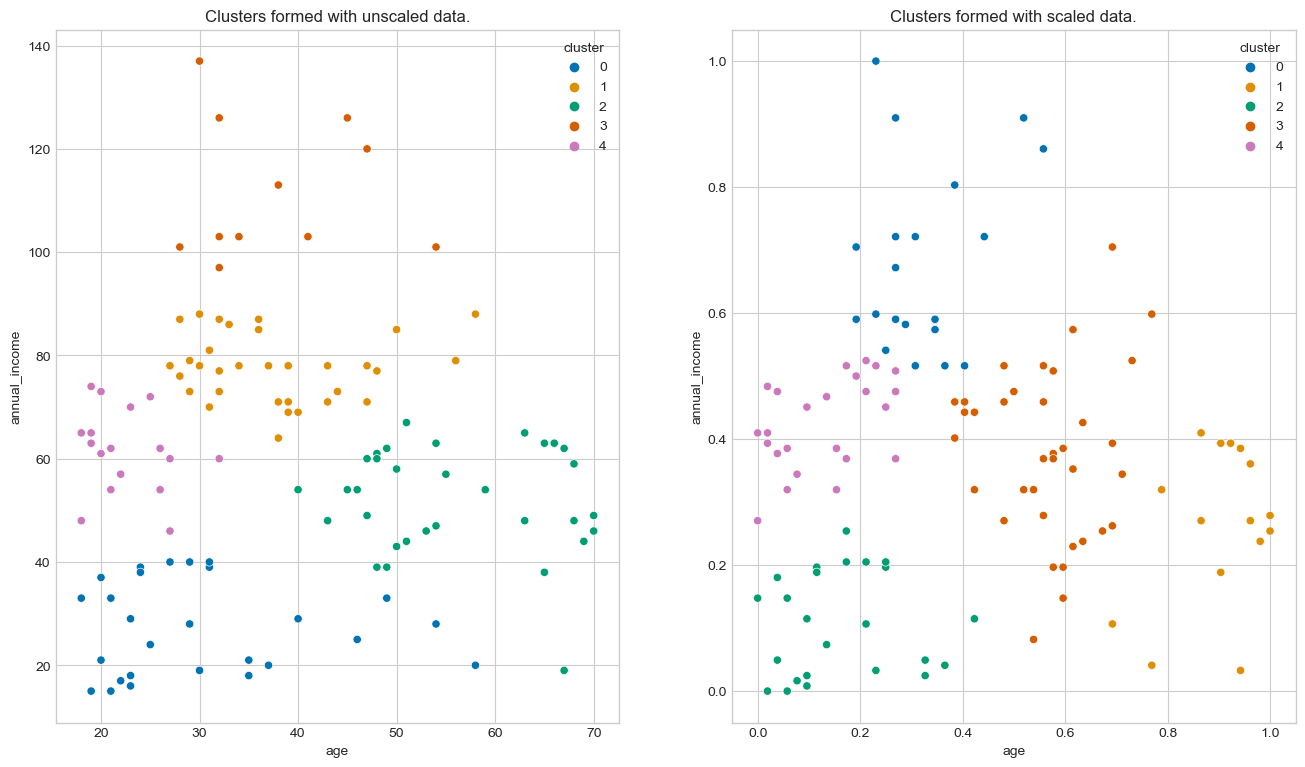

In [76]:
#Compare the clusters generated by scaled and unscaled data
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_train)
axes[0].set_title('Clusters formed with unscaled data.')

sns.scatterplot(ax=axes[1], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df_scale)
axes[1].set_title('Clusters formed with scaled data.')

plt.show()

# Create dummy columns for the 'gender' column
dummy_df = pd.get_dummies(df['gender'], prefix='gender')

# Add the dummy columns to the original dataframe
df = pd.concat([df, dummy_df], axis=1)

df.head()

X = df[['age', 'annual_income']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

df['cluster'] = kmeans.predict(X)

df.head(5)

# Select the columns for the scatter plot
X = df[['age', 'annual_income']]

# Add the 'species' column to the selected columns
X['cluster'] = df['cluster']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='age', y='annual_income', hue='cluster', data=X)

kmeans.cluster_centers_

X.head()

X = X.drop('cluster', axis=1)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

def viz_iris2(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['age', 'annual_income'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = df, x = 'age', y = 'annual_income', ax = ax1, hue = 'cluster', palette=customPalette)
    plt.title('Age Cluster')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(df.age, df.annual_income, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'age', ylabel = 'annual_income', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    df.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

viz_iris2(df)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Scale Data

train, validate, test = wra.split_data(df)

train.shape

def X_split_data(train, validate, test):
    '''
    This function takes in train, validate, and test dataframes and returns X_train, X_validate, and X_test dataframes.
    '''
    # Split the train, validate, and test dataframes into feature and target dataframes
    X_train = train.drop('gender', axis=1)
    X_validate = validate.drop('gender', axis=1)
    X_test = test.drop('gender', axis=1)
    
    return X_train, X_validate, X_test

X_train, X_validate, X_test = X_split_data(train, validate, test)

wra.scaled_data_to_dataframe(X_train, X_validate, X_test)

X_train2 = train[['age', 'annual_income']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train2)

kmeans.predict(X_train2)

df['cluster'] = kmeans.predict(X_train2)

df.head(5)

# Select the columns for the scatter plot
X = df[['age', 'annual_income']]

# Add the 'species' column to the selected columns
X['cluster'] = df['cluster']

# Create a scatter plot with hue by 'species'
sns.scatterplot(x='age', y='annual_income', hue='cluster', data=X)

kmeans.cluster_centers_

X.head()

X = X.drop('cluster', axis=1)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

def viz_iris2(iris):
    """
    This function will plot scatter chart for Actual species and those predicted by K - Means
    """
    
    # Get centroids' coordinates
    centroids = np.array(iris.groupby('cluster')['age', 'annual_income'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    # Add centroids' coordinates into new columns in local df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # Creates new column in local df to map distinct cluster colors
    colors = ['#81DF20' ,'#2095DF','#DF2020']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    # Plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = df, x = 'age', y = 'annual_income', ax = ax1, hue = 'cluster', palette=customPalette)
    plt.title('Age Cluster')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(df.age, df.annual_income, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'age', ylabel = 'annual_income', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    df.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

viz_iris2(df)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')